In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [16]:
dt_lok=pd.read_csv("lok_sabha_data.csv")
dt_lok

,State,Party,Parliament Constituency,Winning Candidate,Total Votes,Margin
0,Andhra Pradesh,Telugu Desam,Srikakulam(2),KINJARAPU RAMMOHAN NAIDU,754328,327901
1,Andhra Pradesh,Telugu Desam,Vizianagaram(3),APPALANAIDU KALISETTI,743113,249351
2,Andhra Pradesh,Telugu Desam,Visakhapatnam(4),SRIBHARAT MATHUKUMILI,907467,504247
3,Andhra Pradesh,Telugu Desam,Amalapuram (SC)(7),G M HARISH (BALAYOGI),796981,342196
4,Andhra Pradesh,Telugu Desam,Eluru(10),PUTTA MAHESH KUMAR,746351,181857
...,...,...,...,...,...,...
539,West Bengal,Bharatiya Janata Party,Tamluk(30),ABHIJIT GANGOPADHYAY,765584,77733
540,West Bengal,Bharatiya Janata Party,Kanthi(31),ADHIKARI SOUMENDU,763195,47764
541,West Bengal,Bharatiya Janata Party,Purulia(35),JYOTIRMAY SINGH MAHATO,578489,17079
542,West Bengal,Bharatiya Janata Party,Bishnupur(37),KHAN SAUMITRA,680130,5567


# Lok Sabha data Analysis :

#### Removing dupliacte rows if present :

In [18]:
duplicates = dt_lok[dt_lok.duplicated(subset='Parliament Constituency', keep=False)]

print("Duplicate Rows based on 'Parliament Constituency':")
duplicates

Duplicate Rows based on 'Parliament Constituency':


,State,Party,Parliament Constituency,Winning Candidate,Total Votes,Margin
329,Punjab,Shiromani Akali Dal,Bathinda(11),HARSIMRAT KAUR BADAL,376558,49656
330,Punjab,Shiromani Akali Dal,Bathinda(11),HARSIMRAT KAUR BADAL,376558,49656


In [19]:
dt_lok = dt_lok.drop_duplicates(subset='Parliament Constituency', keep='first')

print("\nUnique Parliament Constituencies:", dt_lok['Parliament Constituency'].nunique())
print("Rows count after removing duplicates:", len(dt_lok))


Unique Parliament Constituencies: 543
Rows count after removing duplicates: 543


#### Datatypes checking :

In [20]:
data_types = dt_lok.dtypes
print(data_types)

State                      object
Party                      object
Parliament Constituency    object
Winning Candidate          object
Total Votes                object
Margin                     object
dtype: object


In [24]:
dt_lok['Total Votes'] = pd.to_numeric(dt_lok['Total Votes'], errors='coerce')
dt_lok['Margin'] = pd.to_numeric(dt_lok['Margin'], errors='coerce')

print(dt_lok.dtypes)

State                       object
Party                       object
Parliament Constituency     object
Winning Candidate           object
Total Votes                float64
Margin                     float64
dtype: object


#### Describing data and also null values checking :

In [25]:
dt_lok.describe()

,Total Votes,Margin
count,5.420000e+02,5.420000e+02
mean,6.022136e+05,1.623501e+05
std,1.666591e+05,1.472628e+05
min,2.572600e+04,4.800000e+01
25%,4.996228e+05,5.895675e+04
50%,5.867285e+05,1.222660e+05
75%,7.159358e+05,2.229720e+05
max,1.471885e+06,1.175092e+06


In [26]:
null_values = dt_lok.isnull().sum()
print(null_values)

State                      0
Party                      0
Parliament Constituency    0
Winning Candidate          0
Total Votes                1
Margin                     1
dtype: int64


In [28]:
null_rows = dt_lok[dt_lok.isnull().any(axis=1)]
print("\nRows with Null Values:")
null_rows


Rows with Null Values:


,State,Party,Parliament Constituency,Winning Candidate,Total Votes,Margin
120,Gujarat,Bharatiya Janata Party,Surat(24),MUKESHKUMAR CHANDRAKAANT DALAL (Uncontested),NaN,NaN


In [29]:
dt_lok = dt_lok.dropna(subset=['Total Votes', 'Margin'])

null_values_after_drop = dt_lok.isnull().sum()
print("Null Values After Dropping Rows:")
print(null_values_after_drop)


Null Values After Dropping Rows:
State                      0
Party                      0
Parliament Constituency    0
Winning Candidate          0
Total Votes                0
Margin                     0
dtype: int64


# Analysis :

#### States & Their Most Influential Parties :

In [52]:
state_party_votes = dt_lok.groupby(['State', 'Party'])['Total Votes'].sum().reset_index()

idx = state_party_votes.groupby(['State'])['Total Votes'].transform(max) == state_party_votes['Total Votes']
parties_highest_influence = state_party_votes[idx][['State', 'Party', 'Total Votes']]

print("Parties with highest influence in each state:")
parties_highest_influence

Parties with highest influence in each state:


,State,Party,Total Votes
0,Andaman and Nicobar Islands,Bharatiya Janata Party,102436.0
3,Andhra Pradesh,Telugu Desam,12232822.0
5,Arunachal Pradesh,Bharatiya Janata Party,350998.0
7,Assam,Bharatiya Janata Party,6325107.0
10,Bihar,Bharatiya Janata Party,6628026.0
18,Chandigarh,Indian National Congress,216657.0
19,Chhattisgarh,Bharatiya Janata Party,7403197.0
21,Dadra & Nagar Haveli and Daman & Diu,Bharatiya Janata Party,121074.0
23,Goa,Bharatiya Janata Party,257326.0
25,Gujarat,Bharatiya Janata Party,17348473.0


#### Party and their Influence :

In [55]:
party_counts = parties_highest_influence['Party'].value_counts().reset_index()
party_counts.columns = ['Party', 'Count_of_States']

print("Number of states where each party has the highest influence:")
party_counts

Number of states where each party has the highest influence (excluding Independent):
                           Party  Count_of_States
0         Bharatiya Janata Party               19
1       Indian National Congress                8
2                   Telugu Desam                1
3                   Independent                 1
4      Voice of the People Party                1
5        Zoram People’s Movement                1
6       Sikkim Krantikari Morcha                1
7      Dravida Munnetra Kazhagam                1
8         Bharatiya Janata Party                1
9                Samajwadi Party                1
10  All India Trinamool Congress                1


####  Vote Share Analysis by Party (Top 10) :

In [60]:
total_votes_by_party = dt_lok.groupby('Party')['Total Votes'].sum()
total_votes = total_votes_by_party.sum()
vote_share = (total_votes_by_party / total_votes) * 100
top_10_vote_share = vote_share.sort_values(ascending=False).head(10)
print("Vote Share by Party:")
print(top_10_vote_share)

Vote Share by Party:
Party
Bharatiya Janata Party                              47.604432
Indian National Congress                            16.615791
All India Trinamool Congress                         6.184248
Samajwadi Party                                      5.768036
Telugu Desam                                         3.747804
Dravida Munnetra Kazhagam                            3.601323
Janata Dal (United)                                  1.940909
Nationalist Congress Party – Sharadchandra Pawar     1.523247
Shiv Sena (Uddhav Balasaheb Thackrey)                1.462255
Shiv Sena                                            1.168975
Name: Total Votes, dtype: float64


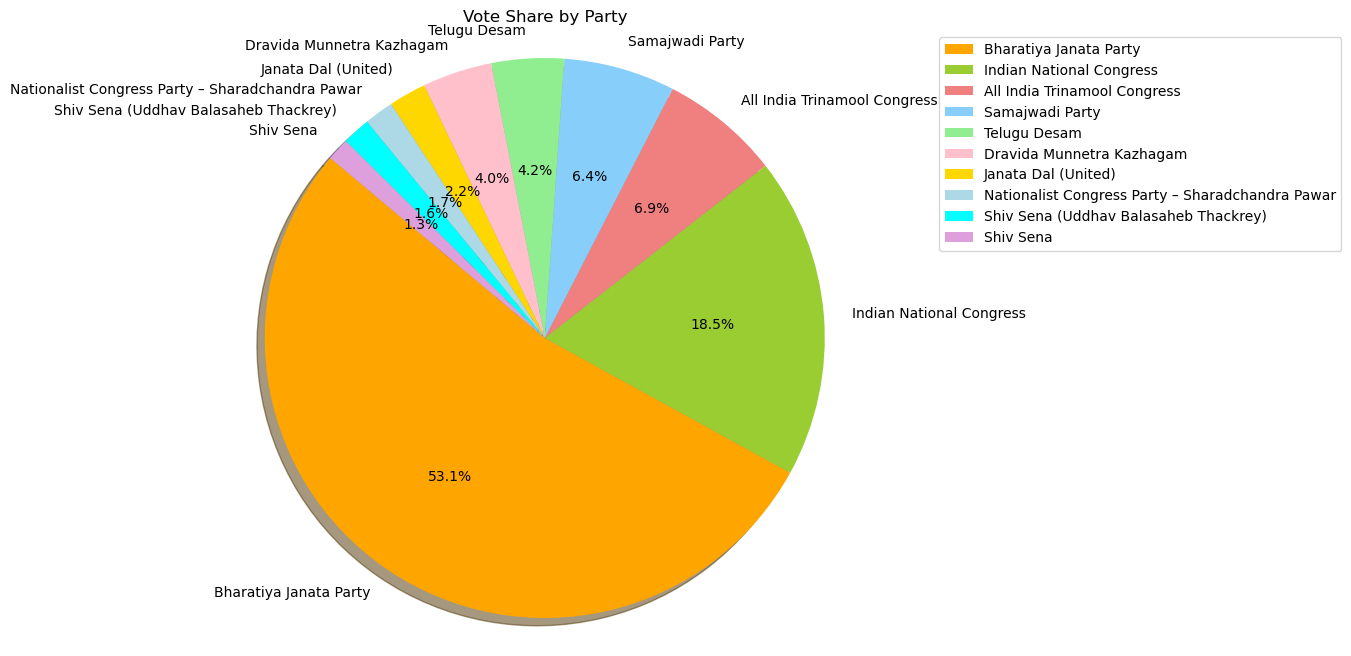

In [67]:
colors = ['orange', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 
          'pink', 'gold', 'lightblue', 'cyan', 'plum']

explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  

plt.figure(figsize=(10, 8))
plt.pie(top_10_vote_share, labels=top_10_vote_share.index, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Vote Share by Party')
plt.axis('equal') 
plt.legend(loc='best', bbox_to_anchor=(1, 1)) 
plt.show()

#### Analysis of Close Contests (Narrow Margins)

In [35]:
narrow_margin_constituencies = dt_lok[dt_lok['Margin'] < 1000]
print("Constituencies with Narrow Margins:")
narrow_margin_constituencies[['State', 'Parliament Constituency', 'Winning Candidate', 'Party', 'Total Votes', 'Margin']]

Constituencies with Narrow Margins:


,State,Parliament Constituency,Winning Candidate,Party,Total Votes,Margin
197,Kerala,Attingal(19),ADV ADOOR PRAKASH,Indian National Congress,328051.0,684.0
279,Maharashtra,Mumbai North West(27),RAVINDRA DATTARAM WAIKAR,Shiv Sena,452644.0,48.0


#### Analysis of High Voter Turnout Constituencies

In [36]:
avg_total_votes = dt_lok['Total Votes'].mean()
high_turnout_constituencies = dt_lok[dt_lok['Total Votes'] > avg_total_votes]
print("Constituencies with High Voter Turnout:")
high_turnout_constituencies[['State', 'Parliament Constituency', 'Winning Candidate', 'Party', 'Total Votes', 'Margin']]

Constituencies with High Voter Turnout:


,State,Parliament Constituency,Winning Candidate,Party,Total Votes,Margin
0,Andhra Pradesh,Srikakulam(2),KINJARAPU RAMMOHAN NAIDU,Telugu Desam,754328.0,327901.0
1,Andhra Pradesh,Vizianagaram(3),APPALANAIDU KALISETTI,Telugu Desam,743113.0,249351.0
2,Andhra Pradesh,Visakhapatnam(4),SRIBHARAT MATHUKUMILI,Telugu Desam,907467.0,504247.0
3,Andhra Pradesh,Amalapuram (SC)(7),G M HARISH (BALAYOGI),Telugu Desam,796981.0,342196.0
4,Andhra Pradesh,Eluru(10),PUTTA MAHESH KUMAR,Telugu Desam,746351.0,181857.0
...,...,...,...,...,...,...
537,West Bengal,Ranaghat(13),JAGANNATH SARKAR,Bharatiya Janata Party,782396.0,186899.0
538,West Bengal,Bangaon(14),SHANTANU THAKUR,Bharatiya Janata Party,719505.0,73693.0
539,West Bengal,Tamluk(30),ABHIJIT GANGOPADHYAY,Bharatiya Janata Party,765584.0,77733.0
540,West Bengal,Kanthi(31),ADHIKARI SOUMENDU,Bharatiya Janata Party,763195.0,47764.0


#### Correlation Between Total Votes and Margin

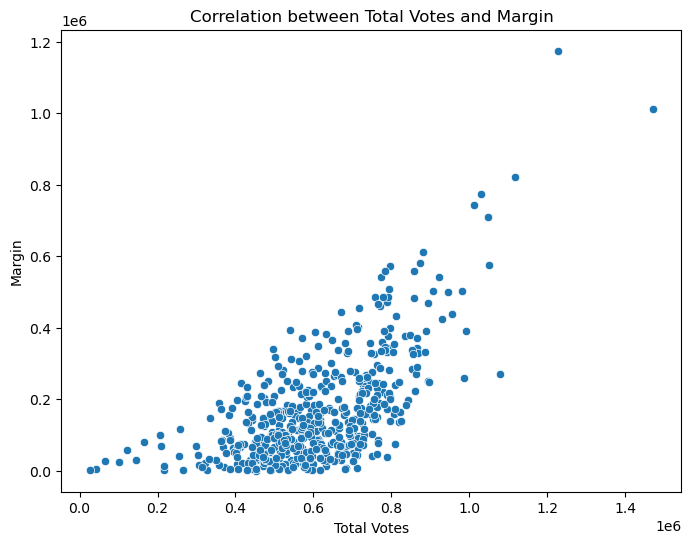

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Votes', y='Margin', data=dt_lok)
plt.title('Correlation between Total Votes and Margin')
plt.xlabel('Total Votes')
plt.ylabel('Margin')
plt.show()


#### Analyzing Winning Candidates
##### Top 10:

In [42]:
winning_candidates = dt_lok.groupby('Winning Candidate').agg({
    'Party': 'first',
    'Total Votes': 'sum',
    'Margin': 'mean'
}).sort_values(by='Total Votes', ascending=False).head(10)

print("Top Winning Candidates:")
winning_candidates

Top Winning Candidates:


,Party,Total Votes,Margin
Winning Candidate,,,
RAKIBUL HUSSAIN,Indian National Congress,1471885.0,1012476.0
RAHUL GANDHI,Indian National Congress,1335094.0,377226.0
SHANKAR LALWANI,Bharatiya Janata Party,1226751.0,1175092.0
SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,1116460.0,821408.0
DR C N MANJUNATH,Bharatiya Janata Party,1079002.0,269647.0
BRIJMOHAN AGRAWAL,Bharatiya Janata Party,1050351.0,575285.0
ABHISHEK BANERJEE,All India Trinamool Congress,1048230.0,710930.0
C R PATIL,Bharatiya Janata Party,1031065.0,773551.0
AMIT SHAH,Bharatiya Janata Party,1010972.0,744716.0


##### Least 10 candidates :

In [71]:
winning_candidates = dt_lok.groupby('Winning Candidate').agg({
    'Party': 'first',
    'Total Votes': 'sum',
    'Margin': 'mean'
}).sort_values(by='Total Votes', ascending=False).tail(10)

print("Least Winning Candidates:")
winning_candidates

Least Winning Candidates:


,Party,Total Votes,Margin
Winning Candidate,,,
MANISH TEWARI,Indian National Congress,216657.0,2504.0
RICHARD VANLALHMANGAIHA,Zoram People’s Movement,208552.0,68288.0
KIREN RIJIJU,Bharatiya Janata Party,205417.0,100738.0
INDRA HANG SUBBA,Sikkim Krantikari Morcha,164396.0,80830.0
TAPIR GAO,Bharatiya Janata Party,145581.0,30421.0
DELKAR KALABEN MOHANBHAI,Bharatiya Janata Party,121074.0,57584.0
BISHNU PADA RAY,Bharatiya Janata Party,102436.0,24396.0
MOHMAD HANEEFA,Independent,65259.0,27862.0
PATEL UMESHBHAI BABUBHAI,Independent,42523.0,6225.0


#### Distribution of Margins Across States

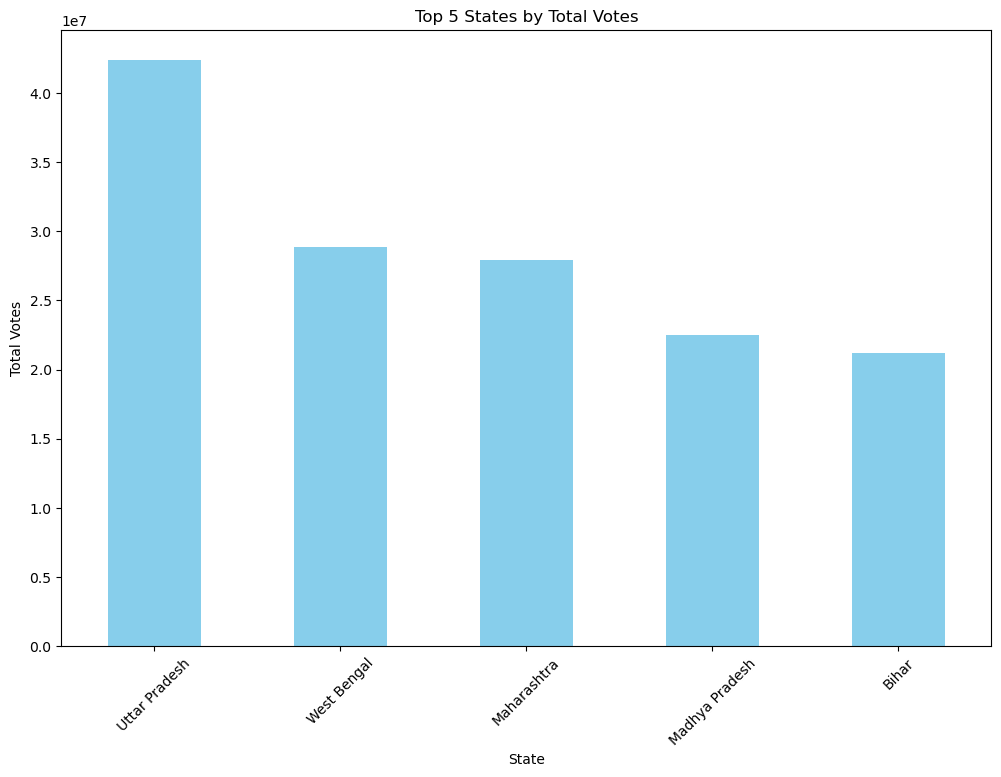

In [76]:
total_votes_per_state = dt_lok.groupby('State')['Total Votes'].sum().sort_values(ascending=False)

top_5_states = total_votes_per_state.head(5)

plt.figure(figsize=(12, 8))
top_5_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States by Total Votes')
plt.xlabel('State')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

#### Influencial Candidate in every party :
This is based on the margin values 

In [77]:
party_max_margin = dt_lok.loc[dt_lok.groupby('Party')['Margin'].idxmax()]

party_max_margin[['Party', 'Winning Candidate', 'Margin']]

,Party,Winning Candidate,Margin
415,Bharatiya Janata Party,BIPLAB KUMAR DEB,611578.0
397,Indian Union Muslim League,NAVASKANI K,166782.0
156,AJSU Party,CHANDRA PRAKASH CHOUDHARY,80880.0
328,Aam Aadmi Party,GURMEET SINGH MEET HAYER,172560.0
495,Aazad Samaj Party (Kanshi Ram),CHANDRASHEKHAR,151473.0
414,All India Majlis-E-Ittehadul Muslimeen,ASADUDDIN OWAISI,338087.0
513,All India Trinamool Congress,ABHISHEK BANERJEE,710930.0
496,Apna Dal (Soneylal),ANUPRIYA PATEL,37810.0
41,Asom Gana Parishad,PHANI BHUSAN CHOUDHURY,222351.0
357,Bharat Adivasi Party,RAJ KUMAR ROAT,247054.0
